# Logistic Regression - Binary

Logistic regression is an appropriate when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

In [2]:
# Importing the dataset
dataset = pd.read_csv('C:/APU/CT108-3-3 - OCDS/Lab Sessions/Lab6 - Logistic Regression/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
dataset.shape

(400, 5)

#### EDA

Text(0.5, 1.0, 'Histogram of Age')

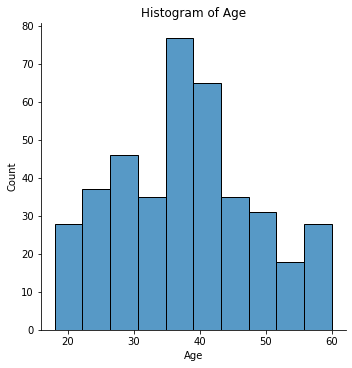

In [4]:
sns.displot(dataset['Age'])
plt.title('Histogram of Age')

Text(0.5, 1.0, 'Histogram of Expected Salary')

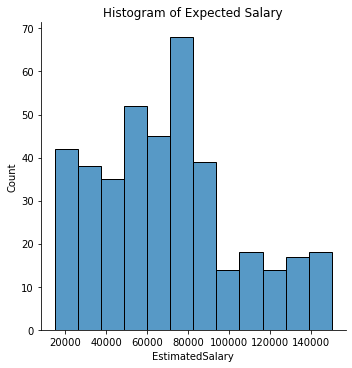

In [5]:
sns.displot(dataset['EstimatedSalary'])
plt.title('Histogram of Expected Salary')

In [6]:
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

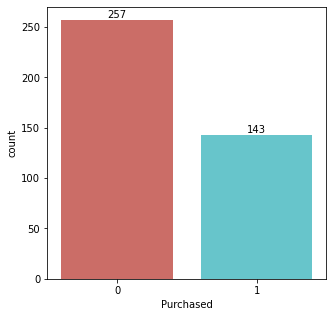

In [7]:
# print(dataset['Purchased'])
import seaborn as sns
plt.subplots(figsize=(5,5))
graph = sns.countplot(dataset['Purchased'], palette ='hls')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 2, dataset['Purchased'].value_counts()[i], ha="center")
    i += 1

In [8]:
dataset[['Age', 'EstimatedSalary']].describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [9]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
dataset['Gender'] = pd.factorize(dataset['Gender'])[0]
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [11]:
X = dataset[dataset.columns[1:4]] 
y = dataset[dataset.columns[4]] 

In [12]:
print(X.columns)
print(X.shape)

Index(['Gender', 'Age', 'EstimatedSalary'], dtype='object')
(400, 3)


In [13]:
y.shape

(400,)

**OLS Regression Results**

In [14]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              Purchased   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     112.4
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           1.14e-52
Time:                        19:35:40   Log-Likelihood:                -150.16
No. Observations:                 400   AIC:                             308.3
Df Residuals:                     396   BIC:                             324.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9041      0.072    -

**Feature ranking with Recursive Feature Elimination (RFE)**

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [16]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select = 5, step = 1)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_) 
print(rfe.ranking_)

[ True  True  True]
[1 1 1]


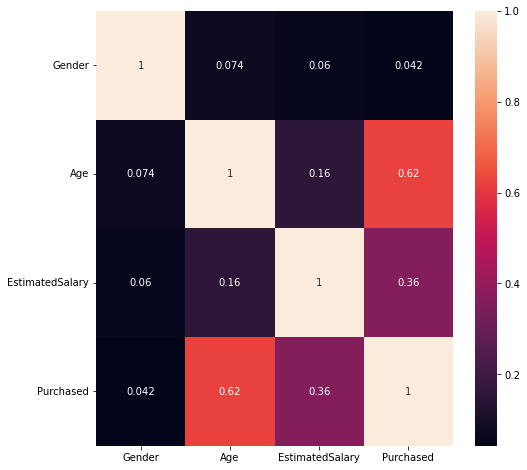

In [17]:
dataset_1 =dataset.drop("User ID", axis=1)
sns.heatmap(dataset_1.corr(), annot = True)
fig = plt.gcf()
fig.set_size_inches(8,8)

**Build LR Model**

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [19]:
# Fitting Logistic Regression to the Training set
# https://www.tutorialspoint.com/scikit_learn/scikit_learn_logistic_regression.htm

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(log_reg.get_params()) # to get to know all the hyper parameters of LR model

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [20]:
# Predicting the Test set results
y_pred = log_reg.predict(X_test)

In [21]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
14,0,0
363,0,0
304,0,0
361,1,0


In [22]:
# Model Evaluation Measures
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score
print ('Accuracy: ', accuracy_score(y_test, y_pred)*100,'%')
print ('Precision: ', precision_score(y_test, y_pred, average='micro')) # macro / micro averaging
print ('Recall: ', recall_score(y_test, y_pred, average='micro'))
print ('F1 Score: ', f1_score(y_test, y_pred, average='micro'))
print ('\n Clasification Report:\n', classification_report(y_test,y_pred))

Accuracy:  72.5 %
Precision:  0.725
Recall:  0.725
F1 Score:  0.7250000000000001

 Clasification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84        58
           1       0.00      0.00      0.00        22

    accuracy                           0.73        80
   macro avg       0.36      0.50      0.42        80
weighted avg       0.53      0.72      0.61        80



In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[58  0]
 [22  0]]


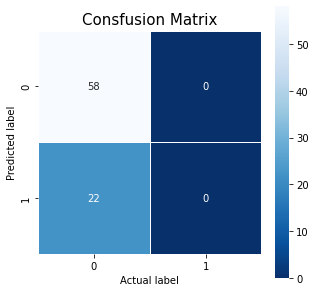

In [24]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.xlabel('Actual label');
plt.ylabel('Predicted label');
plt.title("Consfusion Matrix", size = 15);

**Visualising**

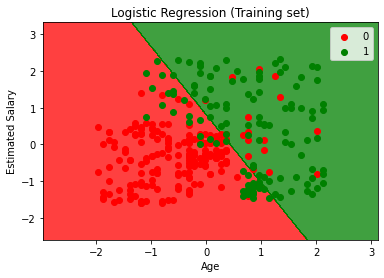

In [25]:
X1 = dataset.iloc[:, [2, 3]].values
X1
y1 = dataset.iloc[:, 4].values
y1
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size = 0.20, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_1 = sc.fit_transform(X_train_1)
X_test_1 = sc.fit_transform(X_test_1)

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression()
classifier.fit(X_train_1, y_train_1)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_1, y_train_1
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

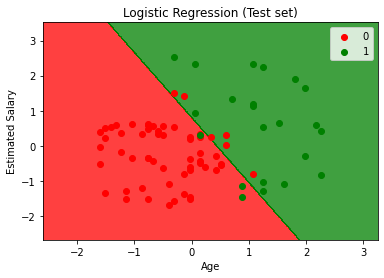

In [26]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_1, y_test_1
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Hyper Parameter Tuning**

In [27]:
from sklearn.model_selection import GridSearchCV
from numpy import arange

model_LR = LogisticRegression()
print(model_LR.get_params())

parameters = dict()
parameters['random_state'] = arange(0, 100, 1) # The seed of the pseudo random number generated which is used while shuffling the data
parameters['C'] = arange(0.0001, 10, 10) # Inverse regularization parameter - A control variable that retains strength modification of Regularization by being inversely positioned to the Lambda regulator. C = 1/λ
parameters['solver'] = ['liblinear', 'newton-cg', 'lbfgs', 'saga'] # Optimization
parameters['penalty'] = ['l1', 'l2'] # Penalization (Regularization).
parameters['multi_class'] = ['auto', 'ovr', 'multinomial']

## Building Grid Search algorithm with cross-validation and acc score.
grid_search_LR = GridSearchCV(estimator=model_LR, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

## Lastly, finding the best parameters.
grid_search_LR.fit(X_train, y_train)
best_parameters_LR = grid_search_LR.best_params_  
best_score_LR = grid_search_LR.best_score_ 
print()
print(best_parameters_LR)
print(best_score_LR)

y_pred_1 = grid_search_LR.predict(X_test)

# Get the accuracy score
lr_acc = accuracy_score(y_test, y_pred_1)
lr_pre = precision_score(y_test, y_pred_1, average='micro')
lr_recall = recall_score(y_test, y_pred_1, average='micro')
lr_f1 = f1_score(y_test, y_pred_1, average='micro')

print("\nLR - Accuracy: {:.3f}.".format(lr_acc))
print("LR - Precision: {:.3f}.".format(lr_pre))
print("LR - Recall: {:.3f}.".format(lr_recall))
print("LR - F1 Score: {:.3f}.".format(lr_f1))
print ('\n Clasification Report:\n', classification_report(y_test,y_pred_1))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

{'C': 0.0001, 'multi_class': 'multinomial', 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}
0.803125

LR - Accuracy: 0.900.
LR - Precision: 0.900.
LR - Recall: 0.900.
LR - F1 Score: 0.900.

 Clasification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        58
           1       0.94      0.68      0.79        22

    accuracy                           0.90        80
   macro avg       0.91      0.83      0.86        80
weighted avg       0.90      0.90      0.89        80



**Class Balancing**

A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE

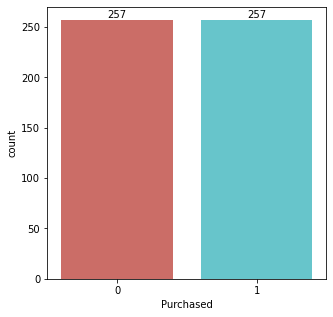

In [28]:
# pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
X_b, y_b = SMOTE().fit_resample(X, y)

plt.subplots(figsize=(5,5))
graph = sns.countplot(y_b, palette ='hls')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 2, y_b.value_counts()[i], ha="center")
    i += 1

In [29]:
X_b.shape

(514, 3)

In [30]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X_b, y_b, test_size = 0.20, random_state = 0)

In [31]:
from sklearn.model_selection import GridSearchCV
from numpy import arange

model_LR = LogisticRegression()

parameters = dict()
parameters['random_state'] = arange(0, 100, 1) # The seed of the pseudo random number generated which is used while shuffling the data
parameters['C'] = arange(0.0001, 10, 10) # Inverse regularization parameter - A control variable that retains strength modification of Regularization by being inversely positioned to the Lambda regulator. C = 1/λ
parameters['solver'] = ['liblinear', 'newton-cg', 'lbfgs', 'saga'] # Optimization
parameters['penalty'] = ['l1', 'l2'] # Penalization (Regularization).
parameters['multi_class'] = ['auto', 'ovr', 'multinomial']

## Building Grid Search algorithm with cross-validation and acc score.
grid_search_LR = GridSearchCV(estimator=model_LR, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

## Lastly, finding the best parameters.
grid_search_LR.fit(X_tr, y_tr)
best_parameters_LR = grid_search_LR.best_params_  
best_score_LR = grid_search_LR.best_score_ 
print()
print(best_parameters_LR)
print(best_score_LR)

y_pred_2 = grid_search_LR.predict(X_te)

# Get the accuracy score
lr_acc = accuracy_score(y_te, y_pred_2)
lr_pre = precision_score(y_te, y_pred_2, average='micro')
lr_recall = recall_score(y_te, y_pred_2, average='micro')
lr_f1 = f1_score(y_te, y_pred_2, average='micro')

print("\nLR - Accuracy: {:.3f}.".format(lr_acc))
print("LR - Precision: {:.3f}.".format(lr_pre))
print("LR - Recall: {:.3f}.".format(lr_recall))
print("LR - F1 Score: {:.3f}.".format(lr_f1))
print ('\n Clasification Report:\n', classification_report(y_te,y_pred_2))


{'C': 0.0001, 'multi_class': 'multinomial', 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}
0.8101968851013812

LR - Accuracy: 0.816.
LR - Precision: 0.816.
LR - Recall: 0.816.
LR - F1 Score: 0.816.

 Clasification Report:
               precision    recall  f1-score   support

           0       0.74      0.91      0.82        47
           1       0.91      0.73      0.81        56

    accuracy                           0.82       103
   macro avg       0.83      0.82      0.82       103
weighted avg       0.83      0.82      0.82       103



In [32]:
# Confusion Matrix
cm_1 = confusion_matrix(y_te, y_pred_2)
print(cm_1)

[[43  4]
 [15 41]]


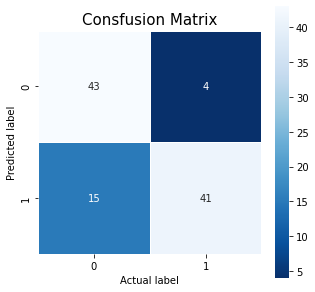

In [33]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_1, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.xlabel('Actual label');
plt.ylabel('Predicted label');
plt.title("Consfusion Matrix", size = 15);

**Plot ROC Curve**

A useful tool when predicting the probability of a binary outcome is the Receiver Operating Characteristic curve, or ROC curve.

It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate.

The true positive rate is calculated as the number of true positives divided by the sum of the number of true positives and the number of false negatives. It describes how good the model is at predicting the positive class when the actual outcome is positive.

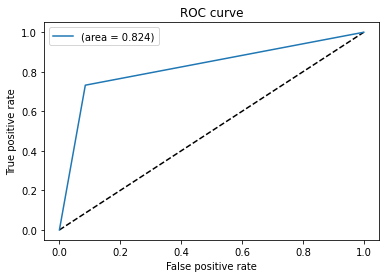

In [34]:
def plot_roc (fpr, tpr, threshold):
    auc = roc_auc_score(y_te, y_pred_2)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='(area = {:.3f})'.format(auc))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

fpr, tpr, thresholds = roc_curve(y_te, y_pred_2)
plot_roc(fpr, tpr, thresholds)